<a href="https://colab.research.google.com/github/SaraAljuraybah/Data-Mining-Project/blob/dev/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 – Data Mining Techniques Application


## [1] Problem

This project aims to analyze and classify the impact of social media usage on the academic performance of undergraduate students. Using data mining techniques such as classification and clustering, we investigate how different patterns of social media behavior influence students' academic outcomes.


## [2] Data Mining Task

This project involves two main data mining tasks:

### • Classification
Used to predict the academic performance category of a student based on their social media usage.  
The goal is to build a model that can learn patterns from labeled data (Supervised).

### • Clustering
Used to discover groups of students with similar social media behavior without using the class label (Unsupervised).
This helps identify pattern.  

These tasks guide the techniques applied in later sections.


## [3] Data

The dataset used in this project is the **“Impact of Social Media on Academic Performance”** dataset from Kaggle.

*Kaggle:*
https://www.kaggle.com/datasets/aderonkeayobami/impact-of-social-media-on-academic-performances


- Format: Excel file (.xlsx)  
- Number of rows: **3028**  
- Number of columns: **47**  
- Class Label: **Impact on Academic Performance** (Likert scale 0–5)  

---

## Dataset Description  

### 1. Sample of the Dataset  
Below we show the first few rows of the dataset to get an overview of the structure.  

---

### 2. Number of Rows and Columns  
We calculate the total number of rows (instances) and columns (attributes/features).  

---

### 3. Data Types of Attributes  
We display the data types of each column to understand whether features are numeric, categorical, or binary.  
Most features are **binary (0/1)** indicating social media usage patterns, while the target column is **ordinal (Likert scale 0–5)**.  

---

### 4. Class Attribute Distribution  
We analyze the distribution of the **Impact on Academic Performance** column to see how many students fall into each category.  
This will help us check for **class imbalance** before moving to classification.  

# 1 . Data Analysis
****
**Statical Summary**

In [127]:
df.describe()

,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,...,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000
mean,18.352378,1.424042,2.205086,1.476222,0.445178,0.782034,0.468296,0.524108,0.233157,0.625495,...,0.529723,1.244055,0.971268,3.469617,3.078930,3.243065,3.338111,2.950198,3.640819,3.215984
std,2.058045,0.502235,0.874640,0.619389,0.497068,0.454810,0.534244,0.499501,0.422911,0.484075,...,0.507728,1.674212,1.644333,1.589963,1.507621,1.555822,1.394496,1.482595,0.971860,1.011929
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.200000,3.000000,2.600000
50%,18.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.800000,3.000000,3.800000,3.200000
75%,19.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,4.600000,4.000000,4.400000,4.000000
max,48.000000,4.000000,5.000000,3.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000


The statistical summary provides an overview of the dataset. For example, the Age attribute shows an average of around 18 years, which is reasonable since the dataset represents undergraduate students. However, the maximum value of 48 years indicates the presence of an outlier that should be considered during preprocessing.

Some attributes such as Gender and Name of College are shown as numerical values in the summary, but in reality, they are categorical features that have been encoded using numbers. Therefore, their mean and standard deviation are not meaningful and should be interpreted through frequency counts instead.

**Missing values**


The missing values analysis shows that there are no null or missing entries in the dataset. This is an advantage since it ensures the dataset is complete and reduces the need for imputation or dropping rows/columns. Having a complete dataset allows us to focus on other preprocessing tasks such as handling outliers, encoding categorical features, and normalization.

## [4] Data Preprocessing

Before applying the data mining techniques, several preprocessing steps were performed in **Phase 2** to ensure the dataset was clean, consistent, and ready for analysis.

**- Removed Duplicates:** Identified and eliminated 160 duplicate entries.

**- Discretized Age:** Converted age column into categories (0, 1, 2) for modeling.

**- Square Root Transformation:** Applied square root transformation to the time spent column to smooth out differences.

**- Z-Score Normalization:** Normalized frequency of use to have mean=0 and std=1.

**- Min-Max Normalization:** Scaled academic performance impact to a 0-1 range.

**- Handled Invalid Values:** Replaced invalid values with NaN and filled them appropriately.

**- Outlier Handling:** Used IQR for numeric columns and median/mode for binary columns to handle outliers.

**- Feature Selection:** Selected 14 key columns for further analysis.

**- Snapshot Comparison:** Compared raw vs. processed data for clarity.


## [5] Data Mining Techniques


##Decision Tree (Classification)




 - Selected features X: all columns except "Impact on Academic Performance"
 - Selected target y: "Impact on Academic Performance"

# - Used three train/test splits:
  * 90% train / 10% test
  * 80% train / 20% test
  * 70% train / 30% test

# - For each split:
  - Trained a Decision Tree with criterion="gini"
  - Trained a Decision Tree with criterion="entropy"
  - Calculated accuracy for each model
  - Plotted a confusion matrix to evaluate predictions

  - Compared all accuracies between splits and criteria
  - Chose the best setup: Decision Tree with Gini on the 90/10 split
  - Visualized the final tree and checked feature importance
  - Found key features affecting performance:
  * Academic Purpose
  * Difficulty in Concentrating on Studies
  * Age
  * Year of Study
  * Use of Twitter and other platforms


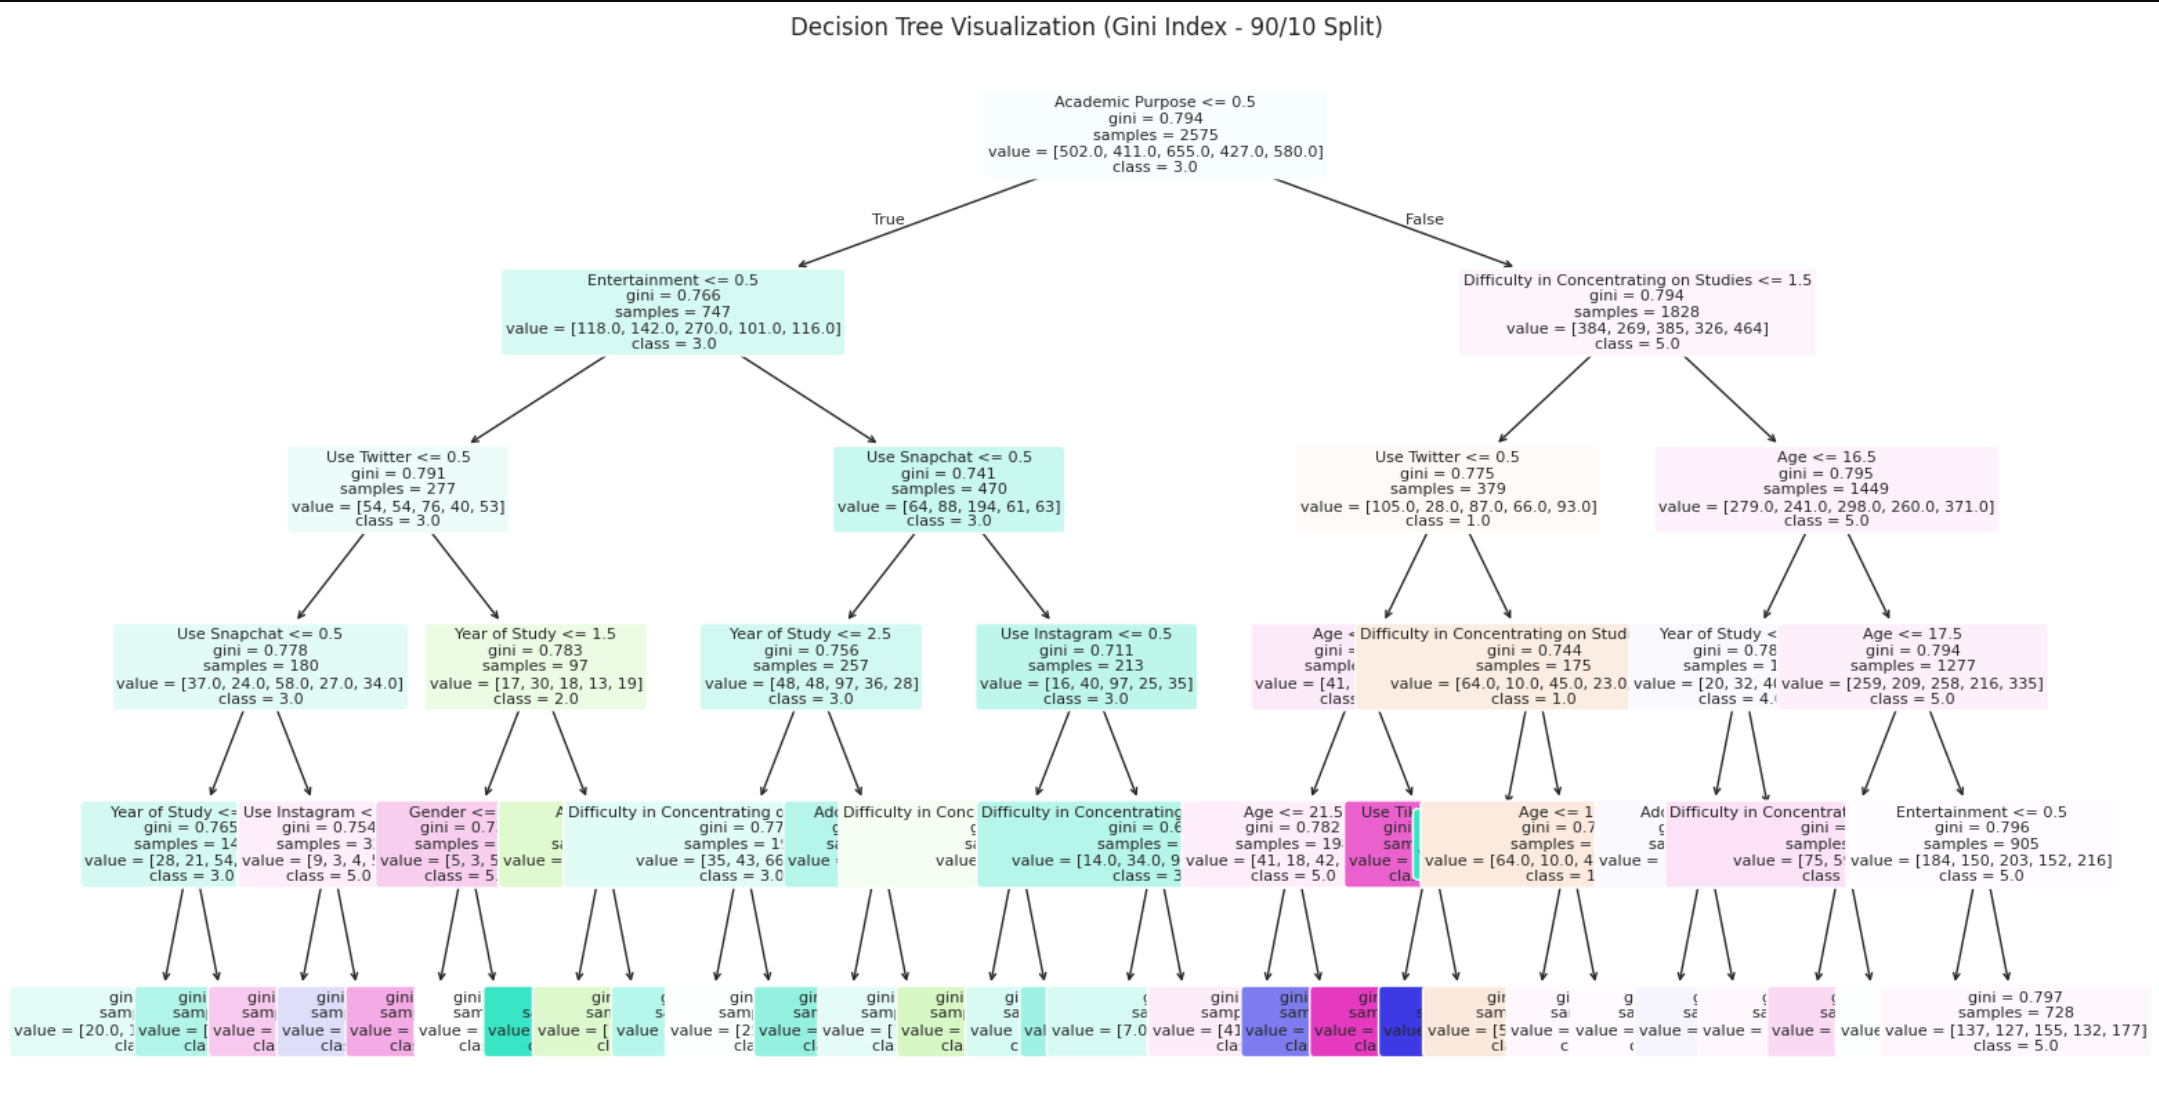

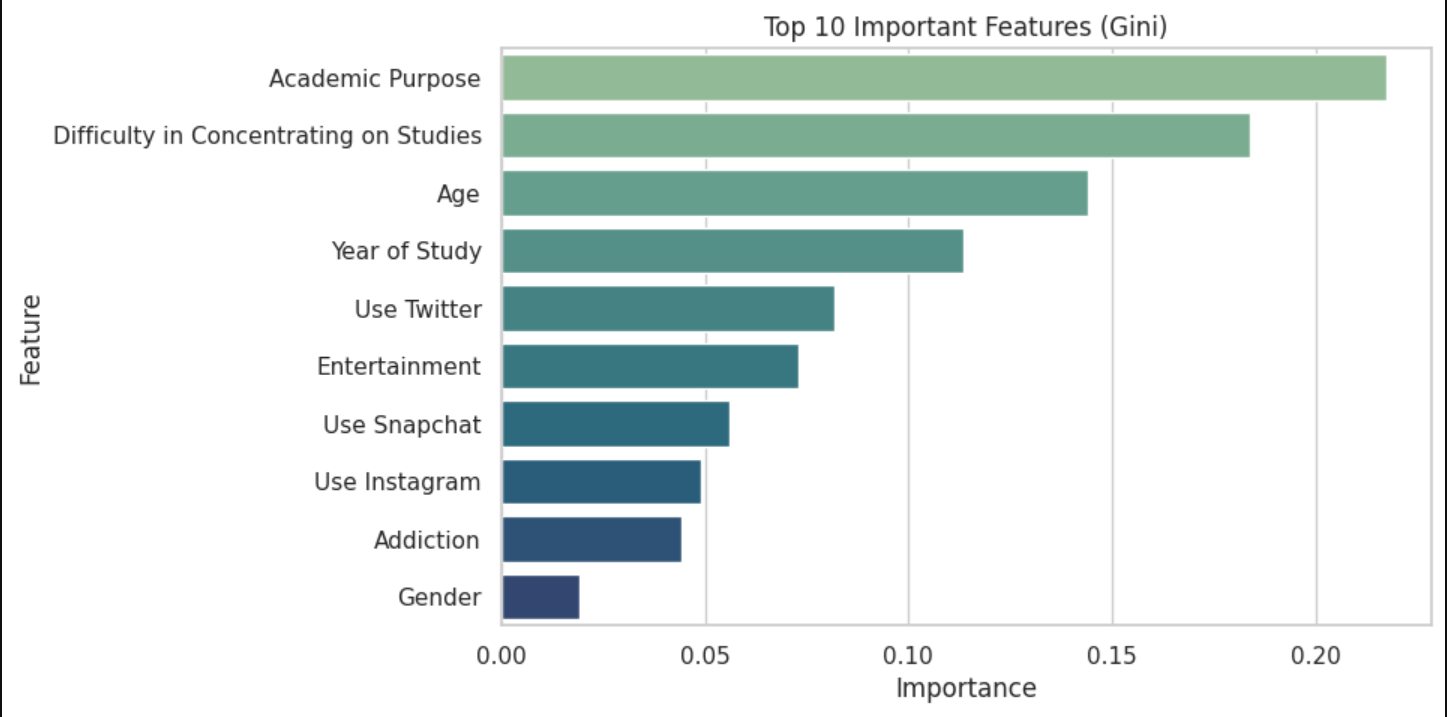

#### Top 10 Important Features in the Decision Tree (Gini)

| #  | Feature                               | Importance |
|----|---------------------------------------|-----------:|
| 1  | Academic Purpose                      | 0.217682   |
| 2  | Difficulty in Concentrating on Studies| 0.184056   |
| 3  | Age                                   | 0.143991   |
| 4  | Year of Study                         | 0.113577   |
| 5  | Use Twitter                           | 0.081748   |
| 6  | Entertainment                         | 0.073020   |
| 7  | Use Snapchat                          | 0.056062   |
| 8  | Use Instagram                         | 0.049086   |
| 9  | Addiction                             | 0.044140   |
| 10 | Gender                                | 0.019042   |


Decision Tree Accuracy for Different Train/Test Splits

| # | Split      | Accuracy |
|---|-----------|---------:|
| 1 | Split 90/10 | 0.285714 |
| 2 | Split 80/20 | 0.294939 |
| 3 | Split 70/30 | 0.274738 |
 #2 *The best score*


Confusion Matrix of the Best Decision Tree Model (Gini, 80/20 Split)

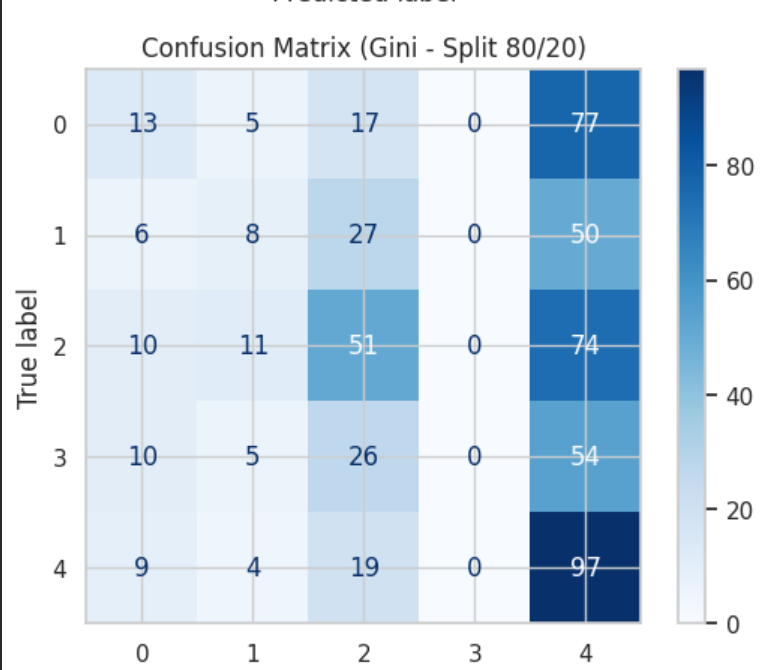

Decision Tree (Entropy) Accuracy for Each Split

| # | Split      | Accuracy (Entropy) |
|---|-----------|-------------------:|
| 1 | Split 1   | 0.272 |
| 2 | Split 2   | 0.284 |
| 3 | Split 3   | 0.282 |
 #*2 the best score*

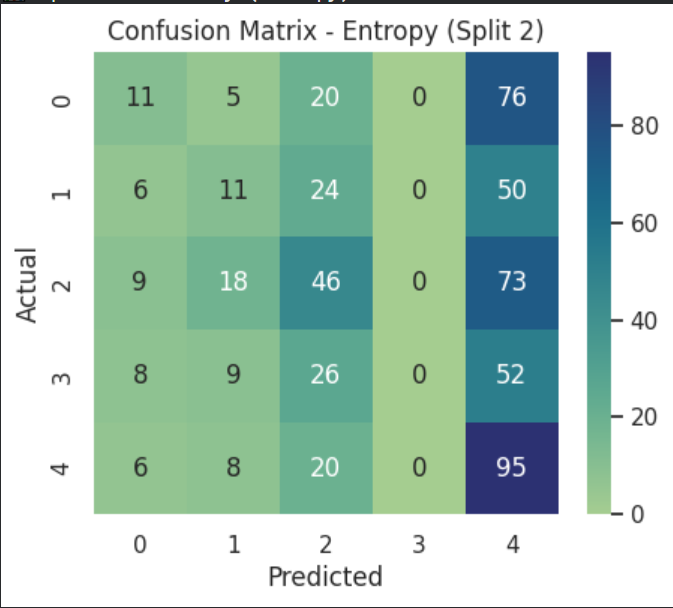

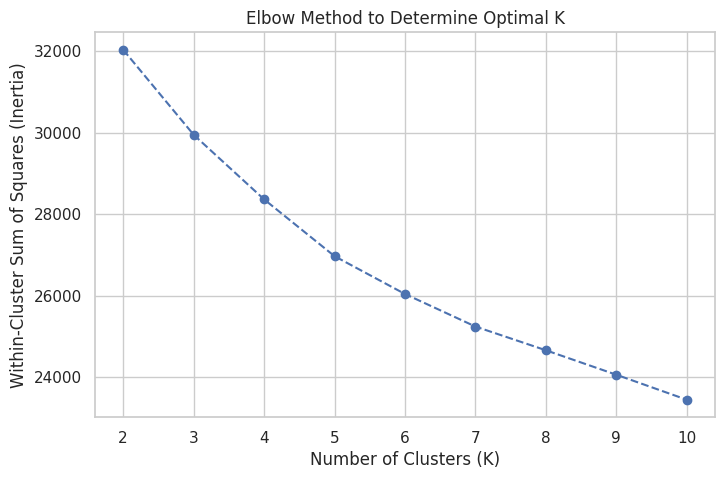

In [165]:
plt.figure(figsize=(8,5))
plt.plot(K_values, inertia_values, marker='o', linestyle='--')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (Inertia)")
plt.grid(True)
plt.show()



The Elbow curve shows the relationship between the number of clusters (K) and the inertia values.
As K increases, the inertia decreases since the clusters become smaller and more compact.
However, after K = 5, the decrease in inertia becomes minimal, forming a noticeable “elbow” in the curve.
Therefore, K = 5 was selected as the optimal number of clusters for this dataset, as it provides a balance between accuracy and model simplicity.

**Silhouette Score Computation**


in this section we compute the Silhouette Coefficient for
different values of K to evaluate cluster quality. The loop iteratively applies the K-means algorithm for K = 2 to 10 and calculates the silhouette score for each model. The silhouette metric measures both intra-cluster cohesion and inter-cluster separation, allowing us to identify the value of K that produces the most meaningful clustering structure.

In [166]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K = {k}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.15659645865875987
K = 3, Silhouette Score = 0.08914076457303621
K = 4, Silhouette Score = 0.10099014408283778
K = 5, Silhouette Score = 0.09788861002978144
K = 6, Silhouette Score = 0.09227620782781726
K = 7, Silhouette Score = 0.08746903092991935
K = 8, Silhouette Score = 0.08826229772367863
K = 9, Silhouette Score = 0.08958098212975886
K = 10, Silhouette Score = 0.09351163439037447


**Silhouette Score Visualization**

This plotting code visualizes the silhouette scores obtained for each K value. The resulting curve allows for an intuitive comparison of clustering performance across different cluster sizes. The peak of the curve indicates the optimal number of clusters, as it corresponds to the model with the highest silhouette score and, therefore, the best overall clustering quality.

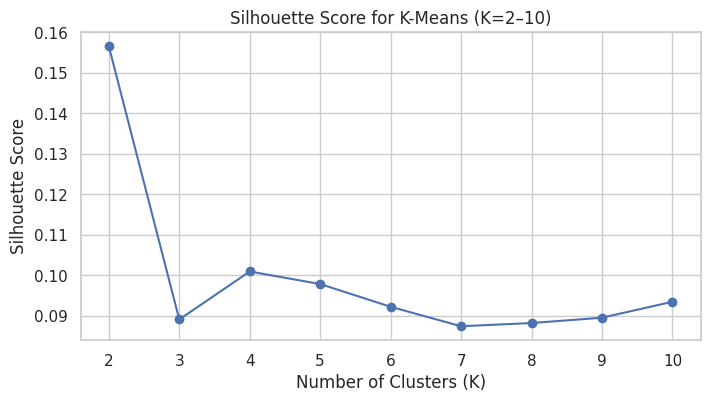

In [167]:
plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score for K-Means (K=2–10)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

The silhouette plot shows that K = 2 gives the highest score and therefore provides the most meaningful and well-separated clustering structure among the tested K values.




**Final K-Means Training Using the Optimal K**

After identifying the optimal number of clusters, this code trains the final K-means model using that specific K. The algorithm assigns each data instance to its corresponding cluster, producing the final cluster labels.

In [168]:
best_k = 2
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)


**PCA Transformation**

in this part Principal Component Analysis (PCA) is  applied to reduce the dimensionality of the dataset to two principal components. PCA captures the maximum variance within fewer dimensions, enabling effective visualization of high-dimensional data. The transformed dataset provides a simplified yet informative representation for cluster visualization.

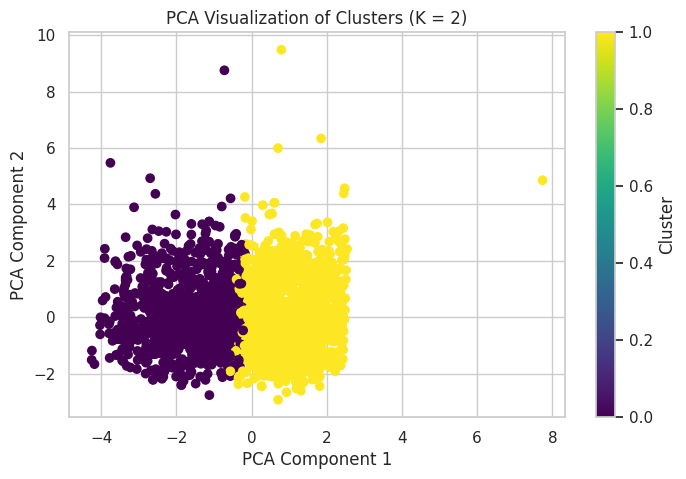

In [169]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(reduced[:,0], reduced[:,1], c=final_labels, cmap='viridis')
plt.title(f"PCA Visualization of Clusters (K = {best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


The PCA scatter plot displays the dataset projected onto two principal components, with each point colored according to its assigned cluster. The visualization shows two noticeably separate groups, where one cluster appears mainly on the left and the other on the right. This separation supports the selection of K = 2, as it indicates that the data naturally forms two distinct clusters.

## [6] 🧠 Evaluation and Comparison


##**Classification evaluation**

Classification preformance was assessed using:

**- Gini**

**- Entropy**

The Decision Tree was evaluated using two splitting criteria: Gini and Entropy.
Both achieved very similar accuracy across all partition sizes, with only minor differences (±0.01).

Entropy gave the highest accuracy (0.284, 80/20 split).

Gini remained almost identical but is computationally faster.

| Split (Train/Test) | Accuracy (Gini) | Accuracy (Entropy) |
|--------------------|-----------------|--------------------|
| 90/10 | 0.273 | 0.272 |
| 80/20 | 0.283 | 0.284 |
| 70/30 | 0.281 | 0.282 |

### 🔍Interpretation:

From the confusion matrices, both criteria show nearly the same prediction pattern.
Entropy is slightly more consistent, while Gini performs similarly with lower complexity.

### Conclusion

Both methods are effective for this dataset.
Entropy is marginally better, but Gini is more efficient and still performs almost the same.


In [170]:
entropy_matrices = []

for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    entropy_matrices.append(cm)


In [171]:
gini_matrices = []

for i, (X_train, X_test, y_train, y_test) in enumerate(datasets):
    model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    gini_matrices.append(cm)


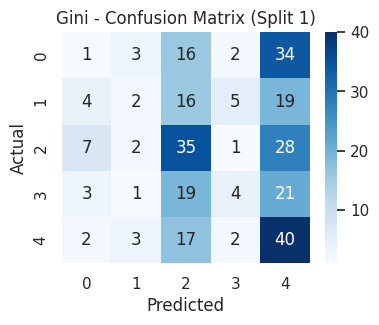

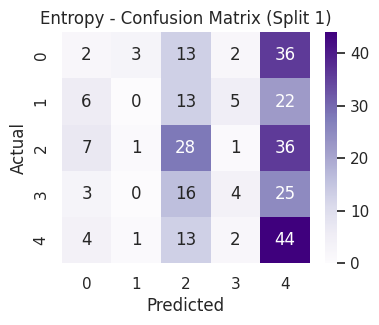

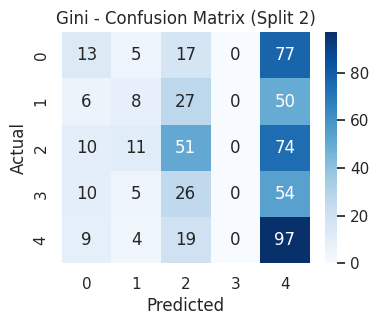

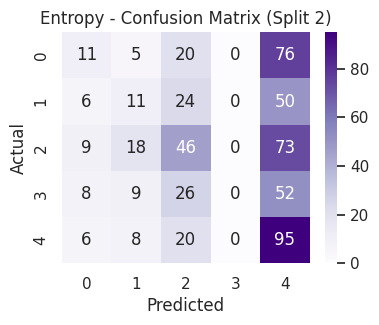

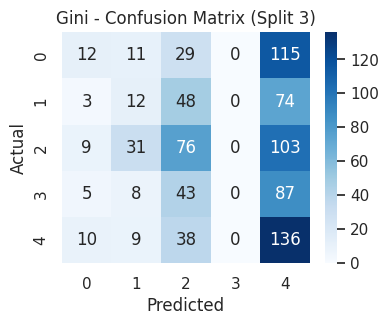

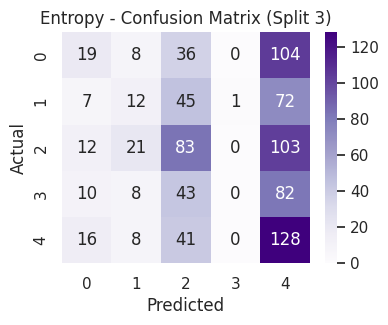

In [172]:
for i in range(3):
    # ----- Gini -----
    plt.figure(figsize=(4,3))
    sns.heatmap(gini_matrices[i], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Gini - Confusion Matrix (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ----- Entropy -----
    plt.figure(figsize=(4,3))
    sns.heatmap(entropy_matrices[i], annot=True, fmt="d", cmap="Purples")
    plt.title(f"Entropy - Confusion Matrix (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


###**Clustering Evaluation**

Clustering performance was assessed using:

- **Inertia (Elbow Method)**  
- **Silhouette Score**  
- **PCA Visualization**  

These metrics help determine the optimal number of clusters (K).

In [173]:
### Silhoutte table
import pandas as pd

silhouette_table = pd.DataFrame({
    "K": list(range(2, 11)),
    "Silhouette Score": silhouette_scores
})

silhouette_table

,K,Silhouette Score
0,2,0.156596
1,3,0.089141
2,4,0.100990
3,5,0.097889
4,6,0.092276
5,7,0.087469
6,8,0.088262
7,9,0.089581
8,10,0.093512


### Elbow Method (Inertia) Plot

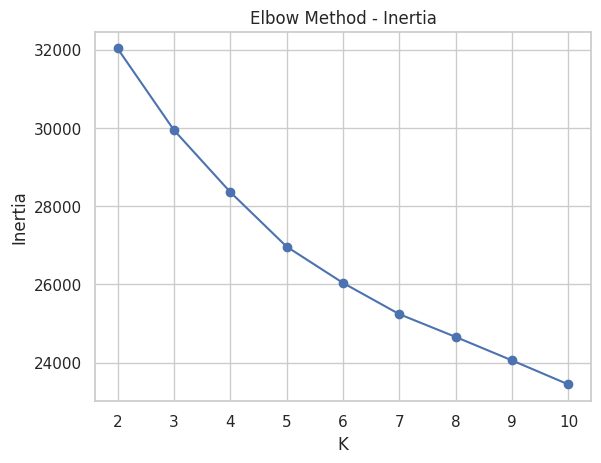

In [174]:
plt.plot(range(2,11), inertia_values, marker='o')
plt.title("Elbow Method - Inertia")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()


### PCA Cluster Visualization
To visually compare the clustering structure across different K values, PCA projections were generated for K = 2, 3, 4, and 5.


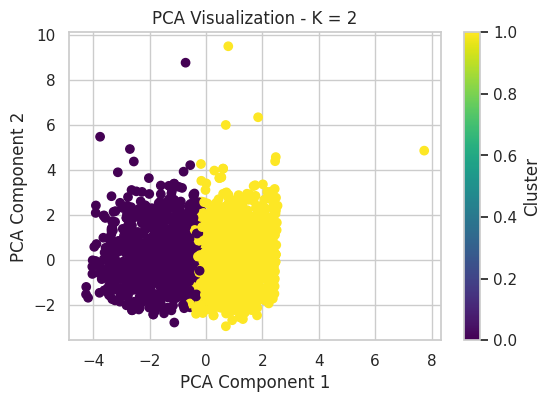

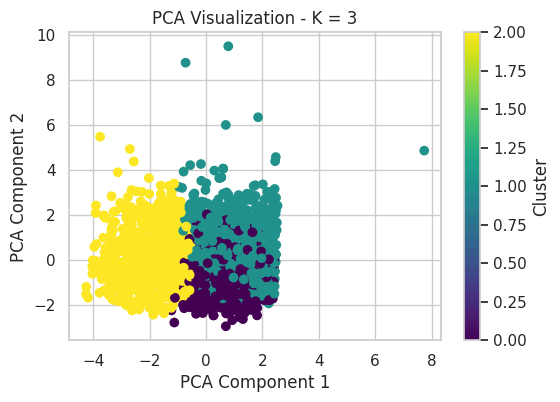

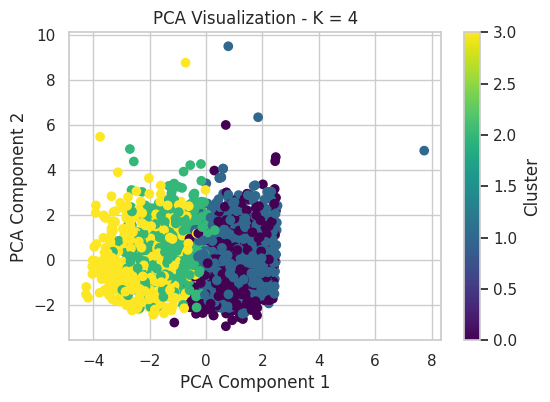

In [175]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

for k in range(2, 5):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)

    plt.figure(figsize=(6,4))
    plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='viridis')
    plt.title(f"PCA Visualization - K = {k}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()


Based on PCA comparison, K = 2 shows the clearest separation between clusters.
Higher K values (3–5) introduce more overlap with no meaningful improvement.
This aligns with the silhouette score and supports choosing K = 2.


### Clustering Evaluation Summary


In [176]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

Ks = [2, 3, 4]

sil_scores = []
sse_values = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    sil_scores.append(silhouette_score(X_scaled, labels))
    sse_values.append(kmeans.inertia_)
evaluation_summary_df = pd.DataFrame({
    "Metric": ["Average Silhouette Score", "Total Within-Cluster SSE"],
    "K = 2": [sil_scores[0], sse_values[0]],
    "K = 3": [sil_scores[1], sse_values[1]],
    "K = 4": [sil_scores[2], sse_values[2]],
}).set_index("Metric")

evaluation_summary_df


,K = 2,K = 3,K = 4
Metric,,,
Average Silhouette Score,0.156596,0.089141,0.100990
Total Within-Cluster SSE,32032.440325,30156.767068,28360.221449


## [7] Finding and Discussion




We implemented two data mining tasks on the student social media dataset: classification and K-means clustering. For the clustering task, we tested several values of K and used the average silhouette width to select the optimal solution; K = 2 achieved the highest silhouette score, so we adopted a 2-means model and visualized the two clusters. For the classification task, we trained a supervised model on the same features and evaluated its performance using accuracy and a confusion matrix, as required in the project. Compared to the research paper, our work uses similar student social media data but focuses on building and evaluating classification and clustering models, while the paper applies SEM-based statistical analysis to examine the relationships between social media use, mental health, and academic performance.


## [8] Refernces


[1] R. A. Mosharrafa, T. Akther, and F. K. Siddique,
    “Impact of social media usage on academic performance of university students:
    Mediating role of mental health under a cross-sectional study in Bangladesh,”
    Health Science Reports, vol. 7, no. 1, p. e1788, 2024, doi: 10.1002/hsr2.1788.
    
[2] A. Ayobami, “Impact of Social Media on Academic Performances,” Kaggle, 2024.
    [Online]. Available:
    https://www.kaggle.com/datasets/aderonkeayobami/impact-of-social-media-on-academic-performances
    (accessed Nov. 19, 2025).
